### Introduction
In this study, we are trying to observe how different perceived comparative advantages of Hybrid crop species against Indigenous crop species and vice-versa in various grounds enlisted below shapes the decision of the households in our study areas (i.e., Bheriganga Municipality of Surkhet district, Bhairabi Rural Municipality of Dailekh district, and Budinanda Municipality of Bajura District) to adopt certain cropping practice in their farmlands. As such, the choice of cropping practice for our study pertains to the decision of the surveyed households to plant only indigenous crops, hybrid or imported crops, or mix of indigenous and hybrid crops. 

Tree-based ensemble model, Random Forests Classifier, is deployed to understand the significance of various grounds of advatange in which certain crop type is perceived to retain comparative advantage in shaping the cropping decisions. While the ensemble algorithm is unable to produce a visually detectable model that observes the degree of signficance of various grounds of advantage in shaping the cropping decision, the predictive robustness of the model generated through the Random Forest Classifier algorithm is tested by assessing the predictive accuracy of the model developed by assigning certain portion of the sample data for model training and evaluation purpose before the predictive accuracy of the model is tested against the testing sample. The model also allows the generate of variables that are most signficant in determing the model itself.      

In [96]:
import pandas as pd
File = pd.read_csv("Master dataframe.csv")
Ag_dec = pd.DataFrame(File)
Ag_dec.drop(columns = "Unnamed: 0", axis=1, inplace = True)
Ag_dec.head()

,Respondent's Name,Municipality,Ward,Sex,Age,Number of Family members,Educational Qualification,Primary Occupation,Caste,Productivity per unit of land,...,Suitable to local biodiversity and pollinators,More amount of fertilizers and pesticide necessary,More amount of water necessary,Adverse impact to soil health and productivity,Less amount of time and energy necessary,Overall climate suitability,Initial costliness,Economic or market viability/demand,Less perishable and higher storage life,Crop Choice
0,Om Bdr. Budha Magar,Bheriganga (Surkhet),4.0,Male,47.0,4.0,Unofficial Education,Agriculture,Indigenous,Hybrid crop species,...,Hybrid crop species,NaN,Hybrid crop species,Indigenous crop species,NaN,NaN,NaN,NaN,Hybrid crop species,Planting of hybrid species of crops only
1,Mina,Bheriganga (Surkhet),4.0,Female,21.0,6.0,Higher Secondary,Trade,Indigenous,NaN,...,NaN,Hybrid crop species,Hybrid crop species,NaN,NaN,NaN,NaN,Hybrid crop species,NaN,Planting of hybrid species of crops only
2,Deepa Shrestha,Bheriganga (Surkhet),4.0,Female,26.0,4.0,Higher Secondary,Agriculture,Chhetri,Hybrid crop species,...,Indigenous crop species,Hybrid crop species,Hybrid crop species,Hybrid crop species,Indigenous crop species,Indigenous crop species,Hybrid crop species,Hybrid crop species,Hybrid crop species,Planting of mix of hybrid and indigenous speci...
3,Krishna Bahadur Bista,Bheriganga (Surkhet),5.0,Male,54.0,5.0,Unofficial Education,Agriculture,Chhetri,Hybrid crop species,...,Indigenous crop species,Hybrid crop species,Hybrid crop species,Hybrid crop species,Indigenous crop species,Indigenous crop species,Indigenous crop species,Indigenous crop species,Hybrid crop species,Planting of hybrid species of crops only
4,Khim Bahadur BK,Bheriganga (Surkhet),4.0,Male,33.0,NaN,Unofficial Education,Agriculture,Dalit,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Planting of hybrid species of crops only


In [107]:
Ag_dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 24 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Respondent's Name                                   117 non-null    object 
 1   Municipality                                        117 non-null    object 
 2   Ward                                                115 non-null    float64
 3   Sex                                                 116 non-null    object 
 4   Age                                                 114 non-null    float64
 5   Number of Family members                            114 non-null    float64
 6   Educational Qualification                           116 non-null    object 
 7   Primary Occupation                                  115 non-null    object 
 8   Caste                                               116 non-null    object 
 9  

##### Exploratory Data Analysis

In [98]:
#Before we move on with our preprocessing steps, lets explore the trend of the data a bit. 
#Grouping crop choices based on locations
Ag_dec_pivot = Ag_dec.pivot_table(index="Municipality", columns="Crop Choice", aggfunc='size', fill_value = 0)
Ag_dec_pivot

Crop Choice,Planting of hybrid species of crops only,Planting of indigenous species of crops only,Planting of mix of hybrid and indigenous species of crops
Municipality,,,
Bhairabi (Dailekh),0,21,13
Bheriganga (Surkhet),8,7,28
Budhinanda (Bajura),1,23,16


In [99]:
#Grouping crop choice based on gender
Ag_dec_pivot_II = Ag_dec.pivot_table(index = "Sex", columns = "Crop Choice", aggfunc="size", fill_value = 0)
Ag_dec_pivot_II

Crop Choice,Planting of hybrid species of crops only,Planting of indigenous species of crops only,Planting of mix of hybrid and indigenous species of crops
Sex,,,
Female,4,36,39
Male,5,14,18


#### Multigrid Visualizations

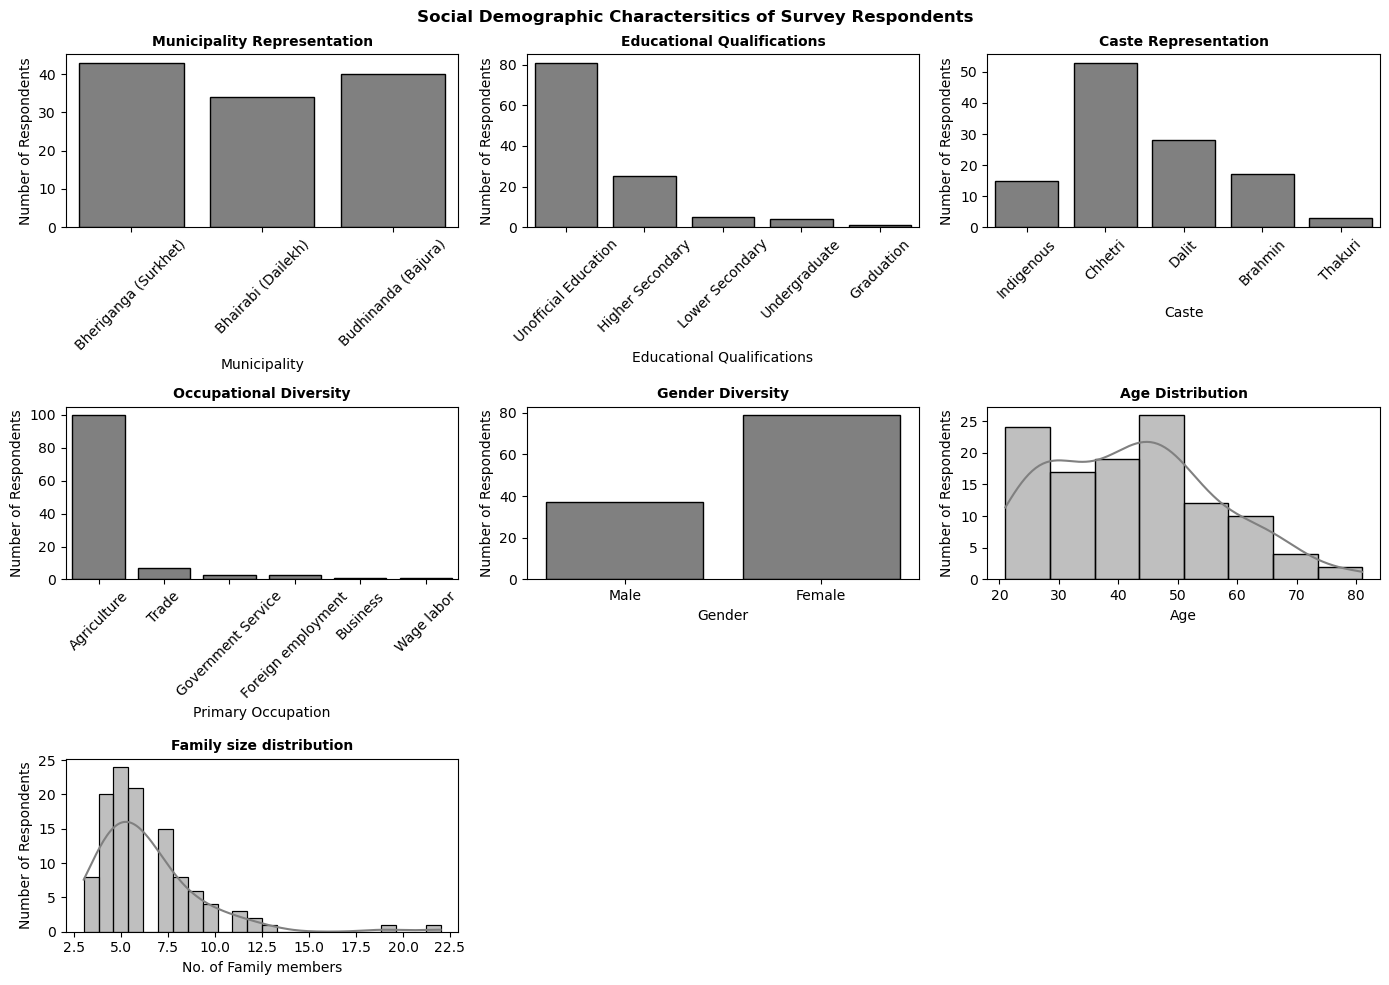

In [100]:
#Rendering multigrid visualization for sociodemographic data
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3,3, sharey = False, figsize = (14,10))

sns.countplot(x = Ag_dec["Municipality"],
                      color= "grey",
                      edgecolor = "black",
                      ax = ax[0,0])
ax[0,0].set_title("Municipality Representation", fontsize = 10, fontweight = "bold")
ax[0,0].set_xlabel("Municipality")
ax[0,0].set_ylabel("Number of Respondents")
ax[0,0].tick_params(axis = "x", rotation = 45)

sns.countplot(x = Ag_dec["Educational Qualification"],
                        color = "grey",
                        edgecolor = "black",
                        ax = ax[0,1])
ax[0,1].set_title("Educational Qualifications", fontsize = 10, fontweight="bold")
ax[0,1].set_xlabel("Educational Qualifications")
ax[0,1].set_ylabel("Number of Respondents")
ax[0,1].tick_params(axis = "x", rotation = 45)

sns.countplot(x = Ag_dec["Caste"],
                        color = "grey",
                        edgecolor = "black",
                        ax = ax[0,2])
ax[0,2].set_title("Caste Representation", fontsize = 10, fontweight= "bold")
ax[0,2].set_xlabel("Caste")
ax[0,2].set_ylabel("Number of Respondents")
ax[0,2].tick_params(axis = "x", rotation = 45)

sns.countplot(x= Ag_dec["Primary Occupation"],
                        color = "grey",
                        edgecolor = "black",
                        ax = ax[1,0])
ax[1,0].set_title("Occupational Diversity", fontsize = 10, fontweight = "bold")
ax[1,0].set_xlabel("Primary Occupation")
ax[1,0].set_ylabel("Number of Respondents")
ax[1,0].tick_params(axis = "x", rotation = 45)

sns.countplot(x = Ag_dec["Sex"],
                           color = "grey",
                           edgecolor = "black",
                           ax = ax[1,1])
ax[1,1].set_title("Gender Diversity", fontsize = 10, fontweight = "bold")
ax[1,1].set_xlabel("Gender")
ax[1,1].set_ylabel("Number of Respondents")

sns.histplot(x = Ag_dec["Age"],
            color = "grey",
            ax = ax[1,2], 
            kde = True)
ax[1,2].set_title("Age Distribution", fontsize = 10, fontweight = "bold")
ax[1,2].set_xlabel("Age")
ax[1,2].set_ylabel("Number of Respondents") 

sns.histplot(x = Ag_dec["Number of Family members"],
            color ="grey",
            ax = ax[2,0],
            kde = True)
ax[2,0].set_title("Family size distribution", fontsize = 10, fontweight = "bold")
ax[2,0].set_xlabel("No. of Family members")
ax[2,0].set_ylabel("Number of Respondents")

ax[2,1].axis("off")
ax[2,2].axis("off")

fig.suptitle("Social Demographic Charactersitics of Survey Respondents", fontsize = 12, fontweight = "bold")
fig.tight_layout()
plt.savefig("Sociodemographic.jpeg")
plt.show()

C:\Users\prien\AppData\Local\Temp\ipykernel_3388\2178542926.py:192: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(h_pad = 9.0)


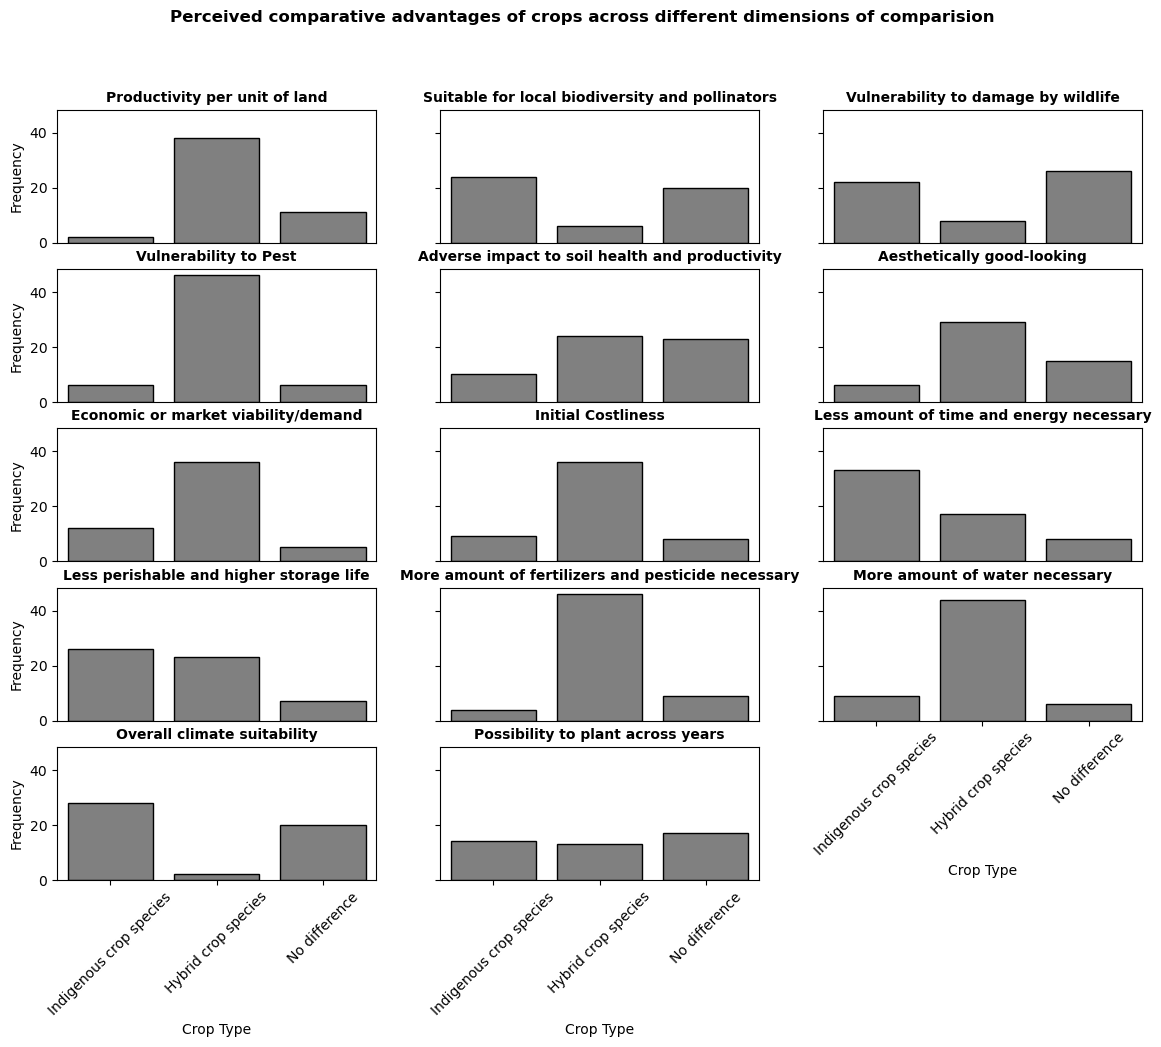

In [101]:
#Now visualizing the crop type the respondents find has retaining comparative advatantage in different comparative groups
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax  =plt.subplots(5, 3, sharey = True, figsize = (14,10))
deesired_order = ["Indigenous crop species", "Hybrid crop species", "No difference"]

ax[0,0] = sns.countplot(x = Ag_dec["Productivity per unit of land"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[0,0])
ax[0,0].set_title("Productivity per unit of land",
                  fontsize = 10,
                  fontweight = "bold")
ax[0,0].set_xlabel("Crop Type")
ax[0,0].set_ylabel("Frequency")
ax[0,0].tick_params(axis = "x", rotation = 45)
ax[0,0].xaxis.set_visible(False)

ax[0,1] = sns.countplot(x = Ag_dec["Suitable to local biodiversity and pollinators"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[0,1])
ax[0,1].set_title("Suitable for local biodiversity and pollinators",
                  fontsize = 10,
                  fontweight = "bold")
ax[0,1].set_xlabel("Crop Type")
ax[0,1].set_ylabel("Frequency")
ax[0,1].tick_params(axis = "x", rotation = 45)
ax[0,1].xaxis.set_visible(False)

ax[0,2] = sns.countplot(x = Ag_dec["Vulnerability to damage by wildlife"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[0,2])
ax[0,2].set_title("Vulnerability to damage by wildlife",
                  fontsize = 10,
                  fontweight = "bold")
ax[0,2].set_xlabel("Crop Type")
ax[0,2].set_ylabel("Frequency")
ax[0,2].tick_params(axis = "x", rotation = 45)
ax[0,2].xaxis.set_visible(False)

ax[1,0] = sns.countplot(x = Ag_dec["Vulnerability to pests"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[1,0])
ax[1,0].set_title("Vulnerability to Pest",
                  fontsize = 10,
                  fontweight = "bold")
ax[1,0].set_xlabel("Crop Type")
ax[1,0].set_ylabel("Frequency")
ax[1,0].tick_params(axis = "x", rotation = 45)
ax[1,0].xaxis.set_visible(False)

ax[1,1] = sns.countplot(x = Ag_dec["Adverse impact to soil health and productivity"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[1,1])
ax[1,1].set_title("Adverse impact to soil health and productivity",
                  fontsize = 10,
                  fontweight = "bold")
ax[1,1].set_xlabel("Crop Type")
ax[1,1].set_ylabel("Frequency")
ax[1,1].tick_params(axis = "x", rotation = 45)
ax[1,1].xaxis.set_visible(False)

ax[1,2] = sns.countplot(x = Ag_dec["Aesthetically good-looking"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[1,2])
ax[1,2].set_title("Aesthetically good-looking",
                  fontsize = 10,
                  fontweight = "bold")
ax[1,2].set_xlabel("Crop Type")
ax[1,2].set_ylabel("Frequency")
ax[1,2].tick_params(axis = "x", rotation = 45)
ax[1,2].xaxis.set_visible(False)

ax[2,0] = sns.countplot(x = Ag_dec["Economic or market viability/demand"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[2,0])
ax[2,0].set_title("Economic or market viability/demand",
                  fontsize = 10,
                  fontweight = "bold")
ax[2,0].set_xlabel("Crop Type")
ax[2,0].set_ylabel("Frequency")
ax[2,0].tick_params(axis = "x", rotation = 45)
ax[2,0].xaxis.set_visible(False)

ax[2,1] = sns.countplot(x = Ag_dec["Initial costliness"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[2,1])
ax[2,1].set_title("Initial Costliness",
                  fontsize = 10,
                  fontweight = "bold")
ax[2,1].set_xlabel("Crop Type")
ax[2,1].set_ylabel("Frequency")
ax[2,1].tick_params(axis = "x", rotation = 45)
ax[2,1].xaxis.set_visible(False)

ax[2,2] = sns.countplot(x = Ag_dec["Less amount of time and energy necessary"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[2,2])
ax[2,2].set_title("Less amount of time and energy necessary",
                  fontsize = 10,
                  fontweight = "bold")
ax[2,2].set_xlabel("Crop Type")
ax[2,2].set_ylabel("Frequency")
ax[2,2].tick_params(axis = "x", rotation = 45)
ax[2,2].xaxis.set_visible(False)

ax[3,0] = sns.countplot(x = Ag_dec["Less perishable and higher storage life"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[3,0])
ax[3,0].set_title("Less perishable and higher storage life",
                  fontsize = 10,
                  fontweight = "bold")
ax[3,0].set_xlabel("Crop Type")
ax[3,0].set_ylabel("Frequency")
ax[3,0].tick_params(axis = "x", rotation = 45)
ax[3,0].xaxis.set_visible(False)

ax[3,1] = sns.countplot(x = Ag_dec["More amount of fertilizers and pesticide necessary"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[3,1])
ax[3,1].set_title("More amount of fertilizers and pesticide necessary",
                  fontsize = 10,
                  fontweight = "bold")
ax[3,1].set_xlabel("Crop Type")
ax[3,1].set_ylabel("Frequency")
ax[3,1].tick_params(axis = "x", rotation = 45)
ax[3,1].xaxis.set_visible(False)

ax[3,2] = sns.countplot(x = Ag_dec["More amount of water necessary"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order, 
                        ax = ax[3,2])
ax[3,2].set_title("More amount of water necessary",
                  fontsize = 10,
                  fontweight = "bold")
ax[3,2].set_xlabel("Crop Type")
ax[3,2].set_ylabel("Frequency")
ax[3,2].tick_params(axis = "x", rotation = 45)

ax[4,0] = sns.countplot(x = Ag_dec["Overall climate suitability"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[4,0])
ax[4,0].set_title("Overall climate suitability",
                  fontsize = 10,
                  fontweight = "bold")
ax[4,0].set_xlabel("Crop Type")
ax[4,0].set_ylabel("Frequency")
ax[4,0].tick_params(axis = "x", rotation = 45)

ax[4,1] = sns.countplot(x = Ag_dec["Possibility to plant across years"],
                        color = "grey",
                        edgecolor = "black",
                        order = deesired_order,
                        ax = ax[4,1])
ax[4,1].set_title("Possibility to plant across years",
                  fontsize = 10,
                  fontweight = "bold")
ax[4,1].set_xlabel("Crop Type")
ax[4,1].set_ylabel("Frequency")
ax[4,1].tick_params(axis = "x", rotation = 45)

ax[4,2].axis("off")

plt.suptitle("Perceived comparative advantages of crops across different dimensions of comparision",
             fontweight = "bold",
             fontsize=12)
plt.tight_layout(h_pad = 9.0)
plt.savefig("crop comparative advantages.jpeg") 

plt.show()

#### Preprocessing the data

In [108]:
#Before we proceed with our tree-based analyses, we shall break the dataframe into independent and target variables. As of now, we shall also get  
#rid of the socio-demographic data as it doesn't serve our purpose for classification analysis
Ag_dec_ind = Ag_dec.iloc[:, 9:-1]
Ag_dec_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Productivity per unit of land                       51 non-null     object
 1   Possibility to plant across years                   44 non-null     object
 2   Aesthetically good-looking                          50 non-null     object
 3   Vulnerability to pests                              58 non-null     object
 4   Vulnerability to damage by wildlife                 56 non-null     object
 5   Suitable to local biodiversity and pollinators      50 non-null     object
 6   More amount of fertilizers and pesticide necessary  59 non-null     object
 7   More amount of water necessary                      59 non-null     object
 8   Adverse impact to soil health and productivity      57 non-null     object
 9   Less amoun

In [109]:
#Now splitting our independent and target datasets into training, evaluation, and test variables
x_value = Ag_dec_ind
y_value = Ag_dec[["Crop Choice"]]

from sklearn.model_selection import train_test_split
x_train_eval, x_test, y_train_eval, y_test = train_test_split(x_value, y_value, test_size = 0.3, random_state = 0, stratify=y_value)
x_train, x_eval, y_train, y_eval = train_test_split(x_train_eval, y_train_eval, test_size = 0.3, random_state=0, stratify = y_train_eval)
print(x_train.shape[0], x_eval.shape[0], x_test.shape[0], y_train.shape[0], y_eval.shape[0], y_test.shape[0])


56 25 36 56 25 36


In [110]:
#Now we shall replace all the null values in different batches with modes that are available for the training batch using the impute sub-package of 
#sci-kit learn. Impute subpackage of scikit learn is especially designed to replace missing values with mean, median, or mode without risking data
# leakage

#But first, we need to create a list of columns to apply on the mode imputed features
columns = x_train.columns.to_list()
columns

['Productivity per unit of land',
 'Possibility to plant across years',
 'Aesthetically good-looking',
 'Vulnerability to pests',
 'Vulnerability to damage by wildlife',
 'Suitable to local biodiversity and pollinators',
 'More amount of fertilizers and pesticide necessary',
 'More amount of water necessary',
 'Adverse impact to soil health and productivity',
 'Less amount of time and energy necessary',
 'Overall climate suitability',
 'Initial costliness',
 'Economic or market viability/demand',
 'Less perishable and higher storage life']

In [111]:
from sklearn.impute import SimpleImputer 
imputer_mode = SimpleImputer(strategy = "most_frequent") #this strategy allows selection of mode as the method of replacement of missing values
imputer_mode.fit(x_train)
x_train = imputer_mode.transform(x_train)
x_train_df = pd.DataFrame(x_train)
x_train_df.columns = columns

x_eval = imputer_mode.transform(x_eval)
x_eval_df = pd.DataFrame(x_eval)
x_eval_df.columns = columns

x_test = imputer_mode.transform(x_test)
x_test_df = pd.DataFrame(x_test)
x_test_df.columns = columns

x_train_df.info()
#features look pretty tight now in terms of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Productivity per unit of land                       56 non-null     object
 1   Possibility to plant across years                   56 non-null     object
 2   Aesthetically good-looking                          56 non-null     object
 3   Vulnerability to pests                              56 non-null     object
 4   Vulnerability to damage by wildlife                 56 non-null     object
 5   Suitable to local biodiversity and pollinators      56 non-null     object
 6   More amount of fertilizers and pesticide necessary  56 non-null     object
 7   More amount of water necessary                      56 non-null     object
 8   Adverse impact to soil health and productivity      56 non-null     object
 9   Less amount 

In [112]:
#Now, it is time we encode our categorical datasets as part of our preprocessing pipeline. The categorical datasets in the independent variables shall be
#proceeded with OneHotEncoding() whereas, the categorical dataset in the target variable shall be proceeded with labelencoding()
from sklearn.preprocessing import OneHotEncoder

Encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown= "ignore") #we need the encoder to be able to handle unknown value because
                                                                                     #there is very lesss selection of "hybrid crop type" as an 
                                                                                     #advantageous crop on all comparative dimensions by our respondents
Encoder.fit(x_train_df)
x_train_encoded = Encoder.transform(x_train_df)
x_train_df_encoded = pd.DataFrame(x_train_encoded, columns = Encoder.get_feature_names_out(x_train_df.columns.to_list()))

x_eval_encoded = Encoder.transform(x_eval_df)
x_eval_df_encoded = pd.DataFrame(x_eval_encoded, columns = Encoder.get_feature_names_out(x_train_df.columns.to_list()))

x_test_encoded = Encoder.transform(x_test_df)
x_test_df_encoded = pd.DataFrame(x_test_encoded, columns = Encoder.get_feature_names_out(x_train_df.columns.to_list()))
x_test_df_encoded.head()
#keep note that the "hybrid crop species" columns have been dropped by drop_first parameter

,Productivity per unit of land_Indigenous crop species,Productivity per unit of land_No difference,Possibility to plant across years_Indigenous crop species,Possibility to plant across years_No difference,Aesthetically good-looking_Indigenous crop species,Aesthetically good-looking_No difference,Vulnerability to pests_Indigenous crop species,Vulnerability to pests_No difference,Vulnerability to damage by wildlife_Indigenous crop species,Vulnerability to damage by wildlife_No difference,...,Less amount of time and energy necessary_Indigenous crop species,Less amount of time and energy necessary_No difference,Overall climate suitability_Indigenous crop species,Overall climate suitability_No difference,Initial costliness_Indigenous crop species,Initial costliness_No difference,Economic or market viability/demand_Indigenous crop species,Economic or market viability/demand_No difference,Less perishable and higher storage life_Indigenous crop species,Less perishable and higher storage life_No difference
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [113]:
#Now encoding out target variables for train, evaluation, and test batches
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_labelled = label_encoder.transform(y_train)
y_train_labelled_df = pd.DataFrame(y_train_labelled)

y_eval_labelled = label_encoder.transform(y_eval)
y_eval_labelled_df = pd.DataFrame(y_eval_labelled)

y_test_labelled = label_encoder.transform(y_test)
y_test_labelled_df = pd.DataFrame(y_test_labelled)

confusion_labels = label_encoder.classes_ #this will allows us to fetch the actual classification names to be inserted in the confusion matrix 
                                          #as we can see we are not naming the columns yet for the label encoded versions 
y_test_labelled_df.head()

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A

,0
0,2
1,2
2,0
3,1
4,1


In [114]:
#So now we shall develop our tree-based classification through the deployment of Random Forests
maxfeatures = int(x_train_df_encoded.shape[1]/3) 

import numpy as np
from sklearn.ensemble import RandomForestClassifier
Estimated = []
trees = np.arange(10, 150, 10)
for values in trees:
    rf = RandomForestClassifier(n_estimators= values,
                                max_features=maxfeatures,
                                max_depth = None,
                                random_state= 0)
    rf.fit(x_train_df_encoded, y_train_labelled_df)
    Eval_scores = rf.score(x_eval_df_encoded, y_eval_labelled_df)
    Estimated.append(Eval_scores)
print(maxfeatures)
print(Estimated)

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

9
[0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72]


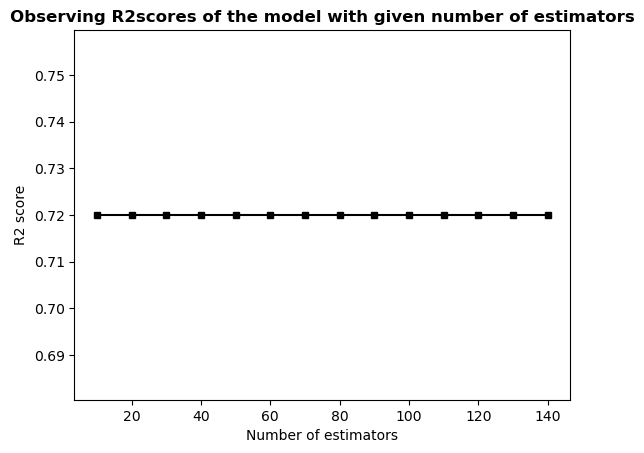

It appears our tree-based trained model is able to explain 72.0 percent of the variance in the evaluation batch for any number of estimators/trees dialled
in our model, therefore we shall stick with 150 estimators to predict variance in our test batch


In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(trees,
        Estimated,
        marker = "s",
        markersize = 5,
        color = "black",
        label = "R2 score")
ax.set_title("Observing R2scores of the model with given number of estimators",
       fontweight = "bold")
ax.set_xlabel("Number of estimators")
ax.set_ylabel("R2 score")
plt.show()
print(f"It appears our tree-based trained model is able to explain {round((Estimated[0]*100),2)} percent of the variance in the evaluation batch for any number of estimators/trees dialled\n"
       f"in our model, therefore we shall stick with 150 estimators to predict variance in our test batch")

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150, 
                            max_features = maxfeatures,
                            max_depth=None, 
                            random_state=0)
rf.fit(x_train_df_encoded, y_train_labelled_df)
print(rf.score(x_test_df_encoded, y_test_labelled_df))
print(f"Our model is able to define {round(rf.score(x_test_df_encoded, y_test_labelled_df), 4)*100} percent of variance in the relationship between our regressor and target variable") 

d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7777777777777778
Our model is able to define 77.78 percent of variance in the relationship between our regressor and target variable


In [117]:
#Now generating our predictions
y_test_labelled_df_hat = rf.predict(x_test_df_encoded)
y_test_labelled_df_hat[0:9]

array([2, 2, 2, 2, 1, 2, 1, 2, 2])

In [118]:
#Now lets check the features that were most important in defining our model
#Regarding that, one important thing to do is to have the names of the features in the first place
Feature_Importance = rf.feature_importances_
Feature_Importance = pd.DataFrame(Feature_Importance)
Feature_Importance = Feature_Importance.T
Feature_Importance.columns = x_train_df_encoded.columns.to_list() #we are going to have the name of the features through this syntax
Feature_Importance = Feature_Importance.T
Feature_Importance.reset_index(inplace = True)

In [119]:
#Now naming the columns
Feature_Importance.columns = ["Features", "Significance"]
Feature_Importance.head()

,Features,Significance
0,Productivity per unit of land_Indigenous crop ...,0.052120
1,Productivity per unit of land_No difference,0.016295
2,Possibility to plant across years_Indigenous c...,0.014173
3,Possibility to plant across years_No difference,0.059688
4,Aesthetically good-looking_Indigenous crop spe...,0.012997


In [120]:
Feature_Importance_sorted = Feature_Importance.sort_values(ascending= False, by = "Significance")
Feature_Importance_df_sorted = Feature_Importance_sorted.head(10)
Feature_Importance_df_sorted 

,Features,Significance
18,Less amount of time and energy necessary_Indig...,0.109622
17,Adverse impact to soil health and productivity...,0.106249
20,Overall climate suitability_Indigenous crop sp...,0.094113
3,Possibility to plant across years_No difference,0.059688
22,Initial costliness_Indigenous crop species,0.055142
0,Productivity per unit of land_Indigenous crop ...,0.052120
8,Vulnerability to damage by wildlife_Indigenous...,0.052007
10,Suitable to local biodiversity and pollinators...,0.047049
11,Suitable to local biodiversity and pollinators...,0.044327
9,Vulnerability to damage by wildlife_No difference,0.039601


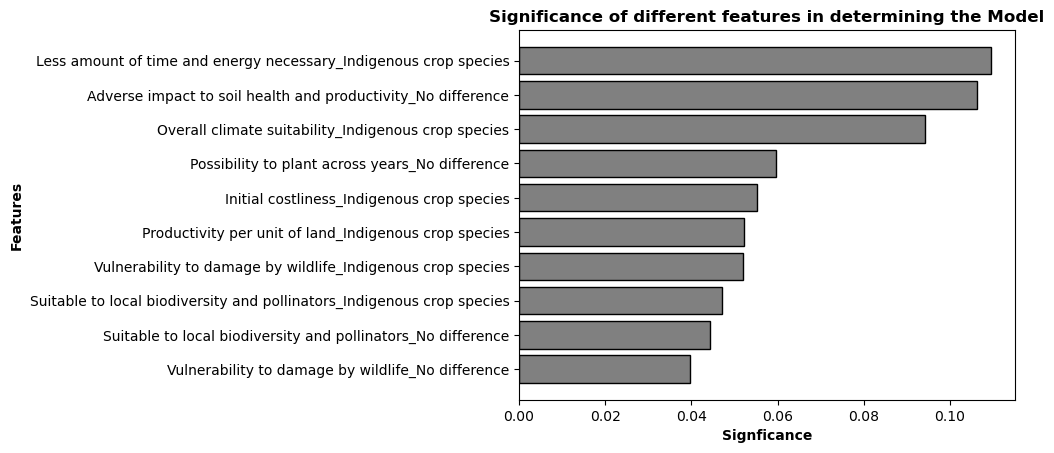

In [121]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.barh(Feature_Importance_df_sorted["Features"],
       Feature_Importance_df_sorted["Significance"],
       color = "grey",
       edgecolor = "black",
       label = "Significance")

ax.invert_yaxis() #for some reason the ascending sorting does not seem to work for barplotting
ax.set_title("Significance of different features in determining the Model", fontweight = "bold")
ax.set_xlabel("Signficance",
              fontweight = "bold")
ax.set_ylabel("Features",
              fontweight = "bold")
plt.show()

In [122]:
# So, lets also print our classification report and lets make sure that actual label names are being used when denoting the scores
from sklearn.preprocessing import LabelEncoder
y_test_unlabelled_df_hat = label_encoder.inverse_transform(y_test_labelled_df)

from sklearn.metrics import classification_report
print(classification_report(y_test_unlabelled_df_hat, y_test))
#This is unbelivably full score on every metrics

                                                           precision    recall  f1-score   support

                 Planting of hybrid species of crops only       1.00      1.00      1.00         3
             Planting of indigenous species of crops only       1.00      1.00      1.00        16
Planting of mix of hybrid and indigenous species of crops       1.00      1.00      1.00        17

                                                 accuracy                           1.00        36
                                                macro avg       1.00      1.00      1.00        36
                                             weighted avg       1.00      1.00      1.00        36



d:\Anaconda_navigator\envs\RP_env\Lib\site-packages\sklearn\preprocessing\_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


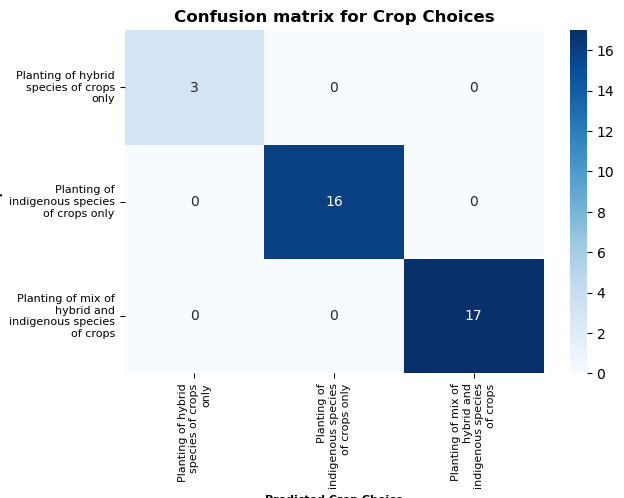

No confusion at all!!!


In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrx = confusion_matrix(y_test_unlabelled_df_hat, y_test)
fig, ax = plt.subplots()
sns.heatmap(conf_matrx,
            annot = True,
            cmap = "Blues",
            xticklabels = confusion_labels,
            yticklabels = confusion_labels,
            ax = ax)
ax.set_title("Confusion matrix for Crop Choices",
             fontsize = 12,
             fontweight = "bold")
ax.set_xlabel("Predicted Crop Choice",
              fontsize = 8,
              fontweight = "bold")
ax.set_ylabel("Actual Crop Choice",
              fontsize = 8,
              fontweight = "bold")

xticklabels = ax.get_xticklabels()
for labels in xticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("right")
    labels.set_va("center")

yticklabels = ax.get_yticklabels()
for labels in yticklabels:
    labels.set_wrap(True)
    labels.set_fontsize(8)
    labels.set_ha("right")
    labels.set_va("center")

plt.tight_layout()
plt.show()
print("No confusion at all!!!")

In [124]:
#Unravelling the encoded labels
for i, labels in enumerate(confusion_labels):
    print(i, labels)

0 Planting of hybrid species of crops only
1 Planting of indigenous species of crops only
2 Planting of mix of hybrid and indigenous species of crops


#### Testing the prediction against the embedded probability score assigned to each target value of each record through the application of ROC_AUC_SCORE 

In [125]:
y_test_labelled_hat_proba = rf.predict_proba(x_test_df_encoded)
y_test_labelled_hat_proba[0:9] #so this provides the embedded probability values that were instrumental in determining the predicted target values 

array([[0.01333333, 0.00666667, 0.98      ],
       [0.00666667, 0.        , 0.99333333],
       [0.08779054, 0.15188453, 0.76032493],
       [0.0285515 , 0.08296802, 0.88848048],
       [0.04013062, 0.91920235, 0.04066704],
       [0.22212123, 0.18857252, 0.58930625],
       [0.04013062, 0.91920235, 0.04066704],
       [0.12      , 0.00666667, 0.87333333],
       [0.10164545, 0.05678765, 0.8415669 ]])

In [126]:
from sklearn.metrics import roc_auc_score
roc_auc_scores = []
classes = ["ovo", "ovr"]
for values in classes:
    scores = roc_auc_score(y_test_labelled,
                  y_test_labelled_hat_proba,
                  multi_class= values, #since we are evaluating against multiple probability values assigned to each of the three target value
                                       #we need to either do ovo or ovr, or both if can't decide. However, it is important to note that applying ova
                                       #is more common compared to using ovo
                  average = "weighted")
    roc_auc_scores.append(scores)
print(roc_auc_scores)
print(f"The roc_auc_scores of {round(roc_auc_scores[0], 2)} for ovo and {round(roc_auc_scores[1], 2)} for ova strategies sppear sufficiently predictive")


[np.float64(0.7485702614379085), np.float64(0.8276969253942938)]
The roc_auc_scores of 0.75 for ovo and 0.83 for ova strategies sppear sufficiently predictive
